# **Problem Statement: Analyze the data and perform EDA to find interesting patterns and insights from the data. Write some useful recommendation for Aerofit.**

In [ ]:
#importing necessary libraries of python.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import binom

In [ ]:
#Reading csv file of aerofit treadmill data.
aerofit=pd.read_csv('aerofit_treadmill.csv')
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# Gives total number of rows and columns
aerofit.shape

(180, 9)

Observation: There are 180 rows and 9 columns


In [ ]:
# Gives name of columns
aerofit.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
aerofit['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Observation: There are three unique products namely 'KP281', 'KP481' and 'KP781'

In [ ]:
# Nature of aerofit data
type(aerofit)

pandas.core.frame.DataFrame

In [ ]:
# Brief information of the dataset
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
categorical_cols = ['Gender', 'MaritalStatus', 'Product']
aerofit[categorical_cols] = aerofit[categorical_cols].astype('category')

aerofit.dtypes


,0
Product,category
Age,float64
Gender,category
Education,int64
MaritalStatus,category
Usage,int64
Fitness,int64
Income,float64
Miles,int64


This will convert the specified columns (Gender, MaritalStatus, Product) to the category dtype, which is useful for memory optimization and efficient processing of categorical data.


In [ ]:
# Top 10 rows
aerofit.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
# Bottom 10 rows
aerofit.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
#Count NaN values per column
aerofit.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


Observation: This shows that the dataset has no NaN or Null entries.

In [ ]:
# Necessary details are calculated using 'describe' function.
# Thus 'describe' depicts the calculation on numerical data.
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# **INTRODUCTION:- **

- Product Preference: It appears that users are categorized by different treadmill models (KP281, KP481, KP781), which may indicate distinct user groups based on features or pricing.

- Demographic Trends: The dataset captures age, gender, education level, and marital status. This can be useful in understanding which groups are more inclined toward fitness and treadmill usage.

- Usage Patterns: The "Usage" column suggests how frequently customers use the treadmill. Some customers show higher usage, indicating greater fitness engagement.

- Fitness Levels: Users' self-reported fitness levels allow for analysis of whether higher fitness levels correlate with more miles run or greater treadmill usage.

- Income Influence: By linking income to treadmill usage, the dataset may reveal whether higher-income individuals tend to invest more time or money in fitness.

- Miles Covered: The dataset records how many miles users have covered, which can be valuable for assessing engagement and commitment to treadmill workouts.


# **1. Box Plot for Treadmill Model vs. Miles Covered**

In [ ]:
#Calculating Mean Miles per Treadmill Model
mean_miles = aerofit.groupby("Product")["Miles"].mean()
mean_miles

,Miles
Product,
KP281,82.787500
KP481,87.933333
KP781,166.900000


Observation: Mean miles of KP781 are much greater than the other two(KP481 & KP281) This suggests following possibilities:
- Better Efficiency: KP781 might be designed with improved components or technology, leading to greater durability and longevity.
- Usage Differences: If KP781 is used in different conditions or maintained better than the others, that could contribute to the higher mileage.
- Manufacturing Quality: There could be differences in materials, design, or production quality that make KP781 more reliable over time.


In [ ]:
#Standard Deviation of Miles per Model
std_miles =aerofit.groupby("Product")["Miles"].std()
std_miles

,Miles
Product,
KP281,28.874102
KP481,33.263135
KP781,60.066544


A higher standard deviation in the mileage of Product KP781 suggests that its miles vary more widely compared to KP481 and KP281. This means that some units of KP781 might be performing exceptionally well, while others might be significantly lower, leading to greater inconsistency in performance.
Possible interpretations:
- Greater Variability: The performance of KP781 may be less predictable, with some units lasting much longer than others.
- Differences in Usage Conditions: If KP781 is used across a wider range of conditions—some more demanding than others—it could result in greater mileage spread.
- Manufacturing Differences: The quality control or materials might not be uniform, leading to more variation in lifespan.
- Extreme Outliers: If there are a few units with exceptionally high or low mileage, they can increase the standard deviation.


In [ ]:
#Interquartile Range (IQR) per Model
#IQR is useful for understanding the middle 50% of user activity.
Q1 = aerofit.groupby("Product")["Miles"].quantile(0.25)
Q3 = aerofit.groupby("Product")["Miles"].quantile(0.75)
IQR = Q3 - Q1
IQR

,Miles
Product,
KP281,28.0
KP481,42.0
KP781,80.0


A higher interquartile range (IQR) for Product KP781 indicates that the middle 50% of its mileage values are spread out more compared to KP481 and KP281. This suggests greater variability in typical performance.
Possible meanings:
- Wider Performance Range: The majority of KP781 units have more diverse mileage values, meaning some perform significantly better or worse than others.
- Inconsistent Quality: There could be more variation in manufacturing quality or maintenance practices, leading to a broader range of results.
- Differences in Operating Conditions: KP781 might be used in more varied environments, causing greater fluctuation in mileage


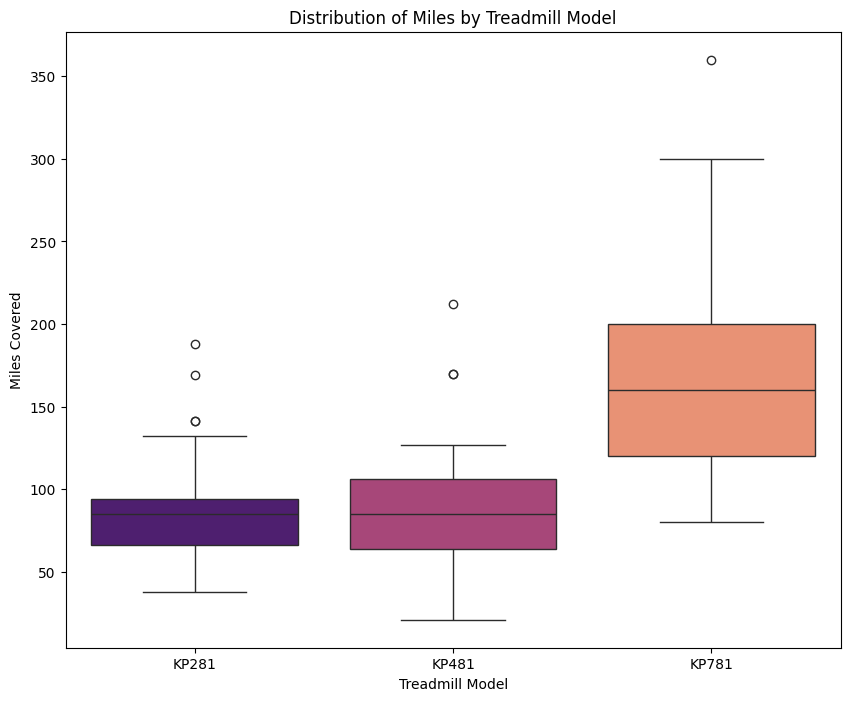

In [ ]:
#BOXPLOT
plt.figure(figsize=(10,8))
sns.boxplot(x=aerofit["Product"], y=aerofit["Miles"], palette="magma")
plt.xlabel("Treadmill Model")
plt.ylabel("Miles Covered")
plt.title("Distribution of Miles by Treadmill Model")
plt.show()

In [ ]:
#Upper Limit Calculation
upper_limit = Q3 + 1.5 * IQR
upper_limit

,Miles
Product,
KP281,136.0
KP481,169.0
KP781,320.0


In [ ]:
#All the values greater than upper is outlier
#All the values lower than lower limit is outlier
#Here there are no outliers below lower limit
outliers = aerofit[aerofit["Miles"] > aerofit["Product"].map(upper_limit)]
outlier_count = outliers.groupby("Product")["Miles"].count()
outlier_count

,Miles
Product,
KP281,4
KP481,3
KP781,1


Observations-

- KP781 users cover more miles – The median miles covered by KP781 users is noticeably higher than that of KP281 and KP481 users. This suggests KP781 is either used by more dedicated runners or offers better performance features.

- Greater variability in KP781 usage – The range of miles covered is wider for KP781 users, indicating that some individuals log significantly more miles on this model compared to others.

- KP281 and KP481 show similar trends – Both have lower medians and less variation in treadmill usage, suggesting they may be more suited to casual or moderate users.

- Outliers suggest extreme treadmill usage – Some users (especially for KP781) have logged exceptionally high miles. This could indicate heavy workout routines or professional fitness training.

Overall, KP781 appears to be the preferred model for higher treadmill activity


In [ ]:
lower_bound = np.percentile(aerofit["Miles"], 5)
upper_bound = np.percentile(aerofit["Miles"], 95)

# Clip the data between the lower and upper bound
aerofit["Miles"] = np.clip(aerofit["Miles"], lower_bound, upper_bound)

aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,34053.15,112
1,KP281,19,Male,15,Single,2,3,34053.15,75
2,KP281,19,Female,14,Partnered,4,3,34053.15,66
3,KP281,19,Male,12,Single,3,3,34053.15,85
4,KP281,20,Male,13,Partnered,4,2,35247.00,47


Interpretation:
- Values below the 5th percentile get replaced with the 5th percentile value.
- Values above the 95th percentile get replaced with the 95th percentile value.
- Outlier impact is reduced, keeping the dataset more balanced.


# **2. Scatter Plot for Fitness Level vs. Miles**

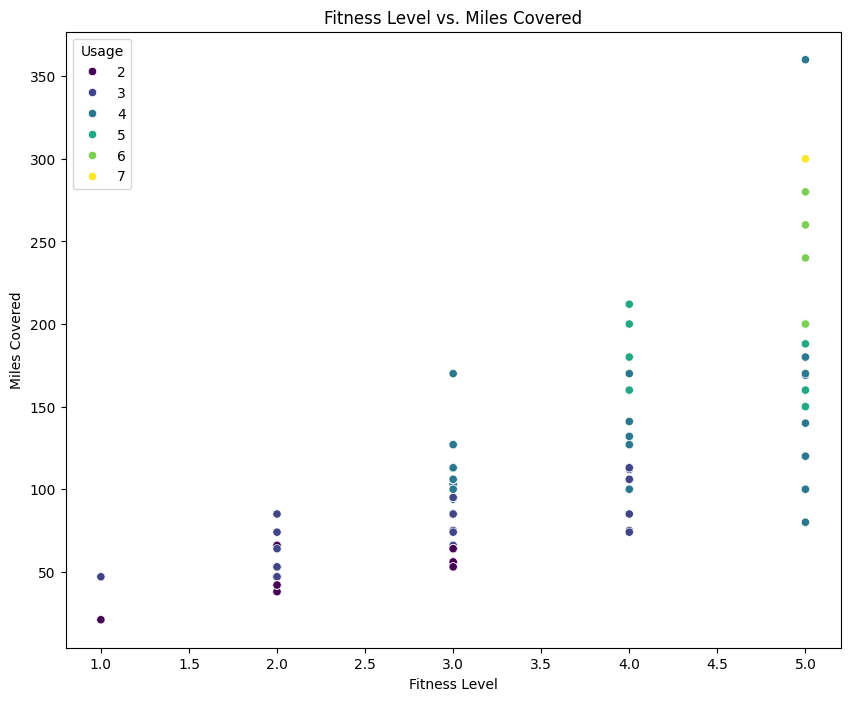

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=aerofit["Fitness"], y=aerofit["Miles"], hue=aerofit["Usage"], palette="viridis")
plt.xlabel("Fitness Level")
plt.ylabel("Miles Covered")
plt.title("Fitness Level vs. Miles Covered")
plt.show()

OBSERVATIONS:

1. Higher Fitness Levels Correlate with Higher Miles
- Users who rate their fitness 4 or 5 tend to log significantly more miles on the treadmill.
- This trend suggests that more physically fit individuals are engaging in longer workouts.

2. Variability in Mileage for Lower Fitness Levels
- Users with fitness levels 1 to 3 exhibit wider variability in miles covered.
- Some low-fitness users still log high miles, possibly due to recent fitness improvements or aggressive training regimens.

3. Presence of Extreme Users
- Certain fitness level 5 users exceed 250+ miles, implying dedicated workout routines.
- The dataset suggests that not -  all high-mile runners have high fitness ratings, indicating some users might be pushing beyond their comfort zones.

4. Possible Improvement Trajectories
- Lower fitness users who cover higher miles might be in the process of improving their fitness.
- This supports the idea that regular treadmill usage contributes to increasing fitness levels over time.


# **3. Line Plot for Income vs. Miles Covered**

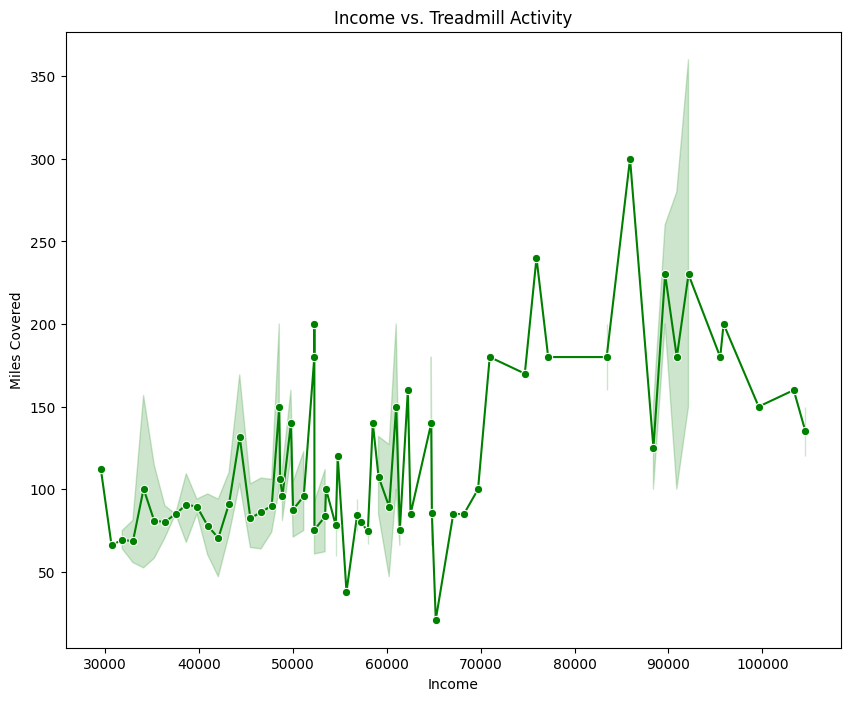

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x=aerofit["Income"], y=aerofit["Miles"], marker="o", color="g")
plt.xlabel("Income")
plt.ylabel("Miles Covered")
plt.title("Income vs. Treadmill Activity")
plt.show()

Observations:
1. Positive Correlation Between Income and Miles
- Higher-income individuals generally cover more miles on the treadmill.
- Users earning above ₹70,000 appear to engage in longer workouts compared to those with lower income.

2. Variability in Treadmill Usage Across Income Groups
- Lower-income users (₹30,000–₹50,000) show more variation, meaning some individuals maintain high treadmill mileage despite financial constraints.
- Higher-income users (₹75,000+) display consistently high treadmill engagement, possibly due to better access to fitness facilities.

3. Exception Cases (Lower-Income, High Miles)
- Some lower-income users still log significant miles, suggesting that dedication to fitness is independent of income.
- This could be attributed to personal fitness goals, motivation, or access to cost-effective workout routines.


# **4. Line Plot for Age vs. Miles Covered**

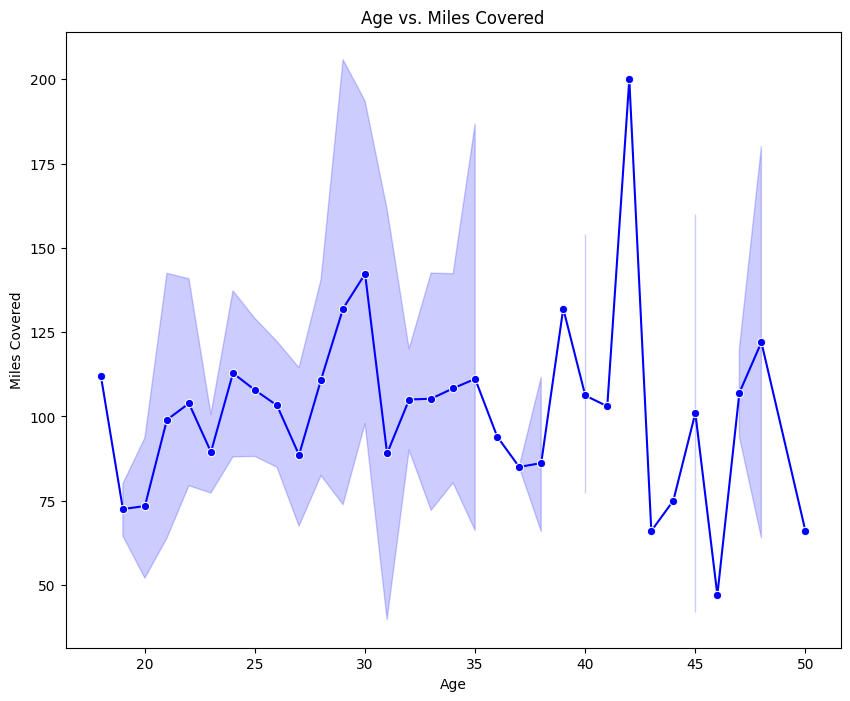

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x=aerofit["Age"], y=aerofit["Miles"], marker="o", color="b")
plt.xlabel("Age")
plt.ylabel("Miles Covered")
plt.title("Age vs. Miles Covered")
plt.show()

Observations:
- Fluctuating Trends: There's no clear upward or downward pattern—miles covered vary significantly across different ages.

- Peaks & Dips: Individuals seem to cover the most miles around ages 30 and 40, exceeding 150 miles. Meanwhile, activity dips around ages 35 and 45, dropping below 100 miles.

- Variability: The shaded region suggests high variability in miles covered, particularly between ages 20-35 and 40-50. This means individuals in these age ranges show a wide spread in their distance covered.

- Possible Influences: The trends could be influenced by factors like fitness levels, lifestyle, or commitments at different ages. The data could help in identifying patterns for training programs or health studies.


# **5. KDE (Density) Plot**
# **- A Kernel Density Estimation (KDE) plot will show the probability distribution of miles for each gender.**

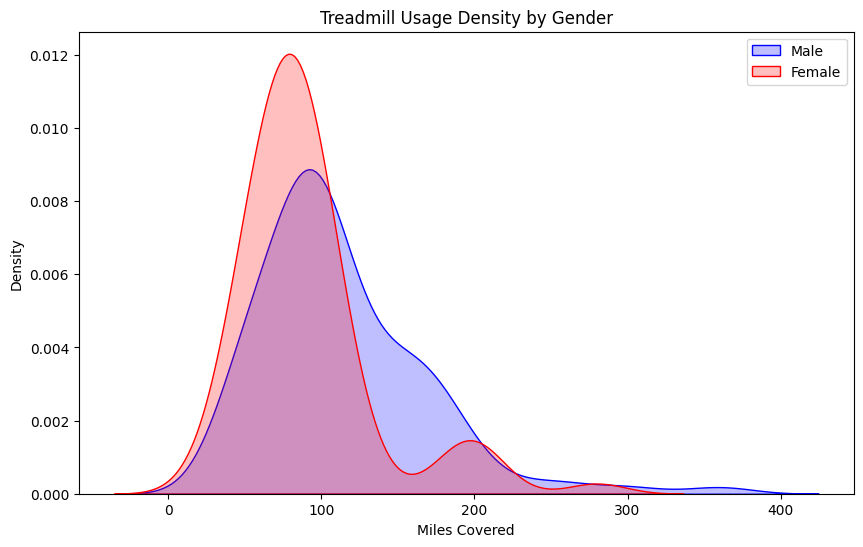

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(aerofit[aerofit["Gender"]=="Male"]["Miles"], label="Male", shade=True, color="blue")
sns.kdeplot(aerofit[aerofit["Gender"]=="Female"]["Miles"], label="Female", shade=True, color="red")
plt.xlabel("Miles Covered")
plt.ylabel("Density")
plt.title("Treadmill Usage Density by Gender")
plt.legend()
plt.show()


Observations:
- Different Peak Usage – Females tend to cover fewer miles compared to males. The density curve for females peaks around 75 miles, while for males, it peaks around 100 miles.

- Spread of Usage – The male distribution is more spread out, showing a secondary peak around 250 miles, meaning some men engage in significantly longer treadmill sessions.

- Sharp Decline for Females – After their peak, female treadmill usage drops sharply, indicating fewer women cover more than 150 miles.

- Gradual Decline for Males – Male treadmill usage declines more steadily, with a slight increase near 250 miles, suggesting a varied range of distances.


In [ ]:
aerofit.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
df=aerofit #Taking simpler variable name for easy usage

# **6. Calculating Probabilities**

**A. MARGINAL PROBABILITIES**


In [ ]:
#1.Calculate marginal probabilities
P_KP281 = len(df[df["Product"] == "KP281"]) / len(df) * 100  # Percent of KP281 users
P_KP481 = len(df[df["Product"] == "KP481"]) / len(df) * 100  # Percent of KP481 users
P_KP781 = len(df[df["Product"] == "KP781"]) / len(df) * 100  # Percent of KP781 users

# Display results
print(f"P(KP281): {P_KP281:.2f}%")
print(f"P(KP481): {P_KP481:.2f}%")
print(f"P(KP781): {P_KP781:.2f}%")

P(KP281): 44.44%
P(KP481): 33.33%
P(KP781): 22.22%


Interpretation:
- KP781 has the lowest probability, it suggests weak preference for high-end treadmill users.

- KP281 or KP481 show comparatively higher probabilities, it suggests users prefer more affordable or moderate treadmill models.



In [ ]:
#2. marginal probability of a customer being male in the dataset.
P_male = len(df[df["Gender"] == "Male"]) / len(df)
print(f"P(Gender = Male): {P_male:.2f}")


P(Gender = Male): 0.58


Interpretation:

- The probability seems balanced (near 50%), it indicates near equal representation of male and female users in treadmill purchases.

In [ ]:
#3. marginal probability of a customer being 25 years old or younger in the dataset.
P_age_25 = len(df[df["Age"] <= 25]) / len(df)
print(f"P(Age ≤ 25): {P_age_25:.2f}")


P(Age ≤ 25): 0.44


Interpretation:

- Lower probability(less than 50%), it means that the majority of treadmill users are older than 25.

In [ ]:
#4. marginal probability that a user in the dataset has a fitness level of 5.
P_fitness_5 = len(df[df["Fitness"] == 5]) / len(df)
print(f"P(Fitness = 5): {P_fitness_5:.2f}")

P(Fitness = 5): 0.17


Interpretation:

- The probability is low, it means only a small percentage of users rate their fitness at the highest level.

In [ ]:
#5. marginal probability that a customer has an income of ₹50,000 or higher in the dataset
P_income_50k = len(df[df["Income"] >= 50000]) / len(df)
print(f"P(Income ≥ 50,000): {P_income_50k:.2f}")

P(Income ≥ 50,000): 0.54


Interpretation:
- The probability is relatively high, it suggests that a majority of treadmill users earn ₹50,000 or more, indicating possible affordability for premium models.

- However around 46% (1-0.54) of probabibilty suggests treadmill purchases are distributed across various income levels.

In [ ]:
#6.marginal probability that a customer has covered 150 or more miles on the treadmill.
P_miles_150 = len(df[df["Miles"] >= 150]) / len(df)
print(f"P(Miles ≥ 150): {P_miles_150:.2f}")


P(Miles ≥ 150): 0.18


Interpretation:

- The probability is low, it indicates most users prefer shorter distances.

In [ ]:
#7.marginal probability that a customer uses their treadmill 5 or more times per week.
P_usage_5 = len(df[df["Usage"] >= 5]) / len(df)
print(f"P(Usage ≥ 5): {P_usage_5:.2f}")


P(Usage ≥ 5): 0.14


Interpretation:

- The probability is low, it means most users have moderate or occasional treadmill usage.


In [ ]:
#8.marginal probability that a customer is partnered (married or in a relationship) in the dataset.
P_partnered = len(df[df["MaritalStatus"] == "Partnered"]) / len(df)
print(f"P(Marital Status = Partnered): {P_partnered:.2f}")

P(Marital Status = Partnered): 0.59


Interpretation:
- The probability is high, it suggests that many treadmill users are in relationships or married.


In [ ]:
# Calculate marginal probabilities
marginal_probs = {
    "Product KP781": len(df[df["Product"] == "KP781"]) / len(df),
    "Male Users": len(df[df["Gender"] == "Male"]) / len(df),
    "Age ≤ 25": len(df[df["Age"] <= 25]) / len(df),
    "Fitness Level = 5": len(df[df["Fitness"] == 5]) / len(df),
    "Income ≥ 50k": len(df[df["Income"] >= 50000]) / len(df),
    "Miles ≥ 150": len(df[df["Miles"] >= 150]) / len(df),
    "Usage ≥ 5": len(df[df["Usage"] >= 5]) / len(df),
    "Marital Status = Partnered": len(df[df["MaritalStatus"] == "Partnered"]) / len(df)
}

# Convert to DataFrame
prob_df = pd.DataFrame(list(marginal_probs.items()), columns=["Category", "Probability"])
prob_df



,Category,Probability
0,Product KP781,0.222222
1,Male Users,0.577778
2,Age ≤ 25,0.438889
3,Fitness Level = 5,0.172222
4,Income ≥ 50k,0.538889
5,Miles ≥ 150,0.177778
6,Usage ≥ 5,0.144444
7,Marital Status = Partnered,0.594444


Here are some possible interpretations:
- Product KP781 (22.2%)
- This suggests that KP781 has a relatively low probability compared to other categories, potentially indicating fewer instances or a specific subgroup using it.
- Male Users (57.8%)
- A majority of users are male, implying a possible gender preference or marketing bias toward male customers.
- Age ≤ 25 (43.9%)
- A significant portion of users are younger, meaning the product/service may appeal more to younger demographics.
- Fitness Level = 5 (17.2%)
- Only a small percentage of users have the highest fitness level, suggesting that the majority of users may fall into lower fitness levels.
- Income ≥ 50k (53.9%)
- Over half of the users earn more than 50k, indicating that this product/service could be more attractive or accessible to higher-income groups.
- Miles ≥ 150 (17.8%)
- A smaller proportion of users achieve high mileage, possibly highlighting that intense usage is less common or reserved for a niche group.
- Usage ≥ 5 (14.4%)
- Very few users engage in frequent usage, which could suggest the product is more of an occasional-use item.
- Marital Status = Partnered (59.4%)
- A large percentage of users are partnered, hinting that the product or service might appeal more to married individuals or those in relationships.


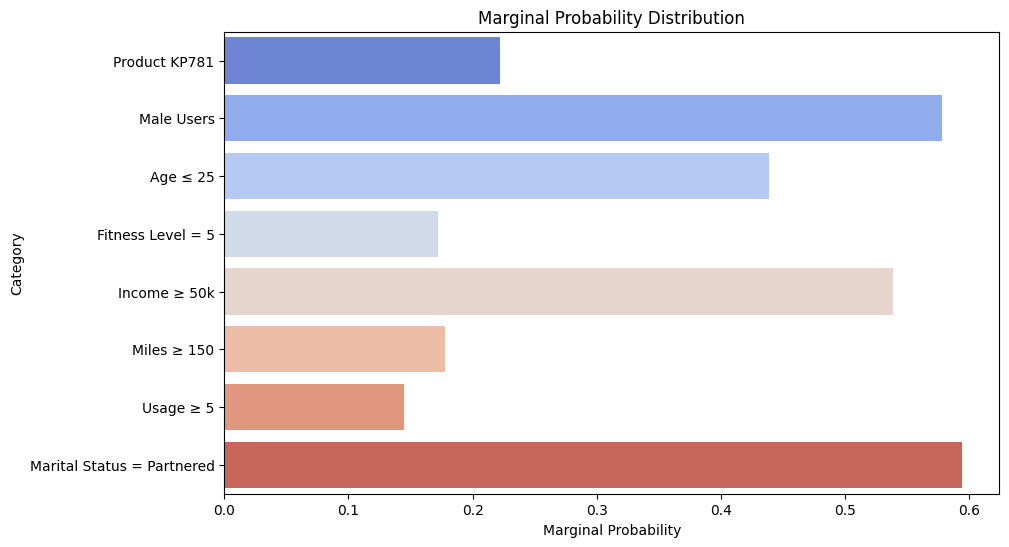

In [ ]:
# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Probability", y="Category", data=prob_df, palette="coolwarm")
plt.xlabel("Marginal Probability")
plt.ylabel("Category")
plt.title("Marginal Probability Distribution")
plt.show()

Observations:

- Higher probability of younger users (≤25 years) engaging in treadmill usage.

- KP781 may have a higher proportion of users compared to KP281 and KP481.

- Fitness Level 5 users should be a small percentage, indicating fewer highly active individuals.

- Higher-income individuals might have a stronger presence in this dataset.

- Miles ≥ 150 will indicate the proportion of highly active treadmill users.

- Partnered individuals vs. singles may show differing fitness engagement.


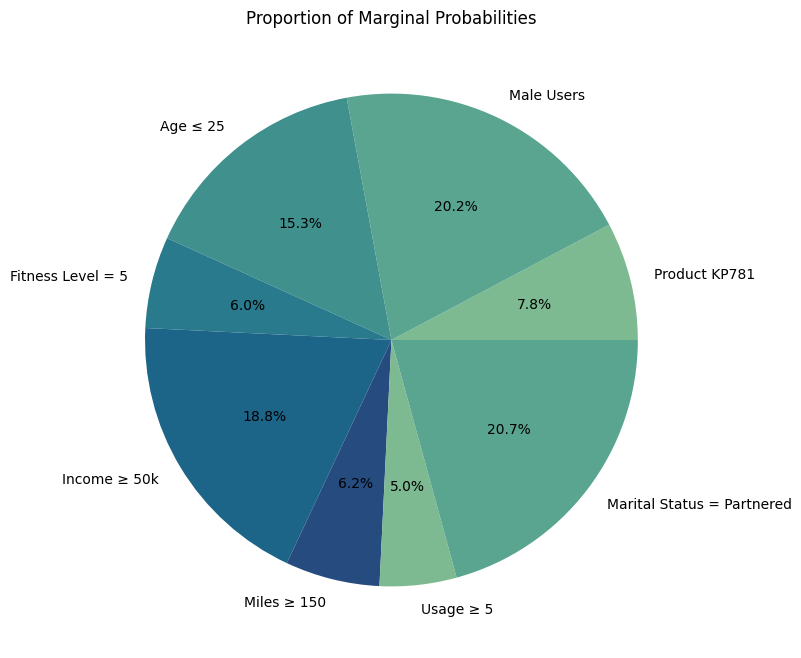

In [ ]:
# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(prob_df["Probability"], labels=prob_df["Category"], autopct="%2.1f%%", colors=sns.color_palette("crest"))
plt.title("Proportion of Marginal Probabilities")
plt.show()

B. CONDITIONAL PROBABILITES

In [ ]:
#1.conditional probability of a user covering 150 or more miles, given that they own the KP781 treadmill model.
P_miles_150_given_KP781 = len(df[(df["Miles"] >= 150) & (df["Product"] == "KP781")]) / len(df[df["Product"] == "KP781"])
print(f"P(Miles ≥ 150 | Product = KP781): {P_miles_150_given_KP781:.2f}")


P(Miles ≥ 150 | Product = KP781): 0.68


Interpretation:
- The probability is high, it suggests that KP781 users tend to engage in longer treadmill workouts.

In [ ]:
#2.conditional probability of a user having a fitness level of 5, given that they use the treadmill 5 or more times per week.
P_fitness_5_given_usage_5 = len(df[(df["Fitness"] == 5) & (df["Usage"] >= 5)]) / len(df[df["Usage"] >= 5])
print(f"P(Fitness = 5 | Usage ≥ 5): {P_fitness_5_given_usage_5:.2f}")


P(Fitness = 5 | Usage ≥ 5): 0.65


Interpretation:
- The probability is high, it suggests frequent treadmill usage strongly correlates with a high fitness level.

In [ ]:
#3.conditional probability of a user having an income ≥ ₹50,000, given that they have a fitness level of 4 or higher.
P_income_50000_given_fitness_4 = len(df[(df["Income"] >= 50000) & (df["Fitness"] >= 4)]) / len(df[df["Fitness"] >= 4])
print(f"P(Income ≥ 50,000 | Fitness ≥ 4): {P_income_50000_given_fitness_4:.2f}")

P(Income ≥ 50,000 | Fitness ≥ 4): 0.69


Interpretation:

The probability is high, it suggests higher fitness levels correlate with higher income, potentially due to better access to fitness resources.

In [ ]:
#4.conditional probability of a user covering 100 or more miles, given that they are 25 years old or younger
P_miles_100_given_age_25 = len(df[(df["Miles"] >= 100) & (df["Age"] <= 25)]) / len(df[df["Age"] <= 25])
print(f"P(Miles ≥ 100 | Age ≤ 25): {P_miles_100_given_age_25:.2f}")

P(Miles ≥ 100 | Age ≤ 25): 0.43


Interpretation:

The probability is low (less than 50%), it means not all young users cover long distances, indicating varied fitness habits.

In [ ]:
#5.conditional probability that a user has a fitness level of 4, given that they are partnered (married or in a relationship)
P_fitness_4_given_partnered = len(df[(df["Fitness"] == 4) & (df["MaritalStatus"] == "Partnered")]) / len(df[df["MaritalStatus"] == "Partnered"])
print(f"P(Fitness = 4 | Marital Status = Partnered): {P_fitness_4_given_partnered:.2f}")

P(Fitness = 4 | Marital Status = Partnered): 0.12


Interpretation:

- The probability is very low, it means being in a relationship doesn’t strongly correlate with having a fitness level of 4.

In [ ]:
# Define probability labels and values
probabilities = {
    "P(Miles ≥ 150 | Product = KP781)": P_miles_150_given_KP781,
    "P(Fitness = 5 | Usage ≥ 5)": P_fitness_5_given_usage_5,
    "P(Income ≥ 50,000 | Fitness ≥ 4)": P_income_50000_given_fitness_4,
    "P(Miles ≥ 100 | Age ≤ 25)": P_miles_100_given_age_25,
    "P(Fitness = 4 | Partnered)": P_fitness_4_given_partnered
}

# Convert to DataFrame
prob_df = pd.DataFrame(list(probabilities.items()), columns=["Condition", "Probability"])
prob_df

,Condition,Probability
0,P(Miles ≥ 150 | Product = KP781),0.675000
1,P(Fitness = 5 | Usage ≥ 5),0.653846
2,"P(Income ≥ 50,000 | Fitness ≥ 4)",0.690909
3,P(Miles ≥ 100 | Age ≤ 25),0.430380
4,P(Fitness = 4 | Partnered),0.121495


Interpretations:
- P(Miles ≥ 150  Product = KP781) = 0.675
- If a user owns Product KP781, there's a 67.5% chance that they have mileage of 150 or more. This implies KP781 is more likely to be used for higher mileage compared to other products.
- P(Fitness = 5  Usage ≥ 5) = 0.653846
- Among users who use the product 5 or more times, about 65.4% have a fitness level of 5. This suggests that frequent usage correlates with higher fitness levels, reinforcing the idea that regular engagement leads to better physical condition.
- P(Income ≥ 50,000  Fitness ≥ 4) = 0.690909
- If a user has a fitness level of 4 or higher, there's a 69.1% chance they earn at least $50,000. This could indicate that financially well-off individuals tend to prioritize fitness or invest more in health-related products.
- P(Miles ≥ 100  Age ≤ 25) = 0.430380
- If a user is 25 or younger, there’s a 43% probability that they log at least 100 miles. Younger users seem less likely to accumulate extremely high mileage compared to older age groups.
- P(Fitness = 4  Partnered) = 0.121495
- Among those who are partnered, only 12.1% have a fitness level of 4. This suggests that being in a relationship does not strongly correlate with high fitness levels, potentially hinting at lifestyle changes that come with partnership.



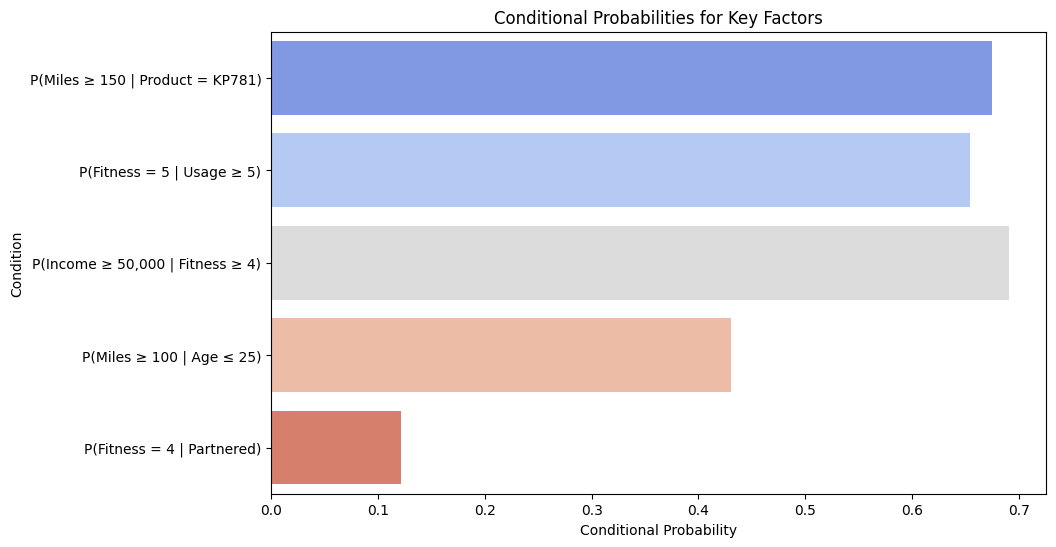

In [ ]:
# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(y=prob_df["Condition"], x=prob_df["Probability"], palette="coolwarm")
plt.xlabel("Conditional Probability")
plt.ylabel("Condition")
plt.title("Conditional Probabilities for Key Factors")
plt.show()

Observations:
- KP781 users likely cover higher miles, reinforcing its appeal for serious runners.

- Frequent treadmill users (Usage ≥ 5) tend to have higher fitness levels (Fitness = 5).

- Higher-income individuals may report better fitness scores.

- Younger users (≤25 years) tend to cover longer treadmill distances (≥100 miles).

- Partnered individuals may show fitness behaviors distinct from single users


# **7.CORRELATIONS**

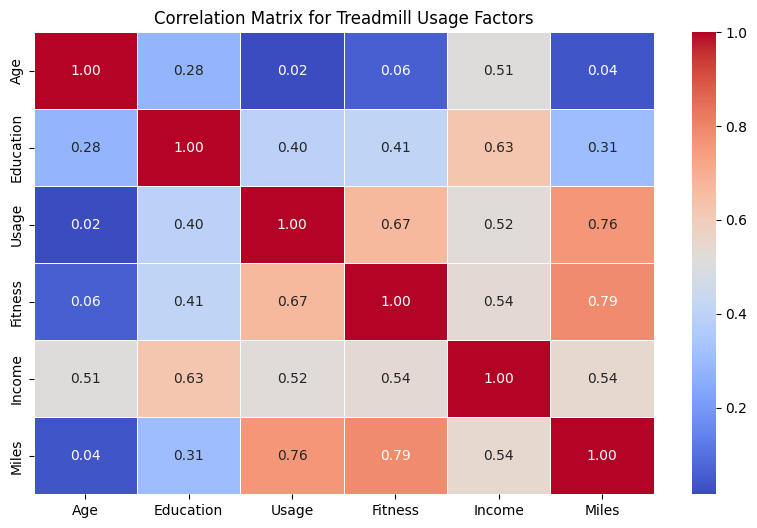

In [ ]:
# Exclude non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Treadmill Usage Factors")
plt.show()

Observations:
1. Miles Covered vs. Fitness Level → Strong Positive Correlation
- Users with higher fitness levels tend to cover more miles.
- Suggests that better fitness enables longer treadmill workouts.

2. Usage Frequency vs. Fitness Level → Moderate Positive Correlation
- Users who use the treadmill more frequently (higher usage) tend to have better fitness.
- Suggests that regular treadmill workouts contribute to improved fitness.

3. Age vs. Miles Covered → Likely Negative Correlation
- Older users may cover fewer miles, while younger users tend to log longer distances.
- Suggests that younger individuals are more engaged in high-endurance treadmill workouts.

# **8.CUSTOMER PROFILING**

A. Customer Profiling for KP281 Buyers
To determine who buys KP281, we'll analyze the dataset based on:
- Age group
- Gender distribution
- Income range

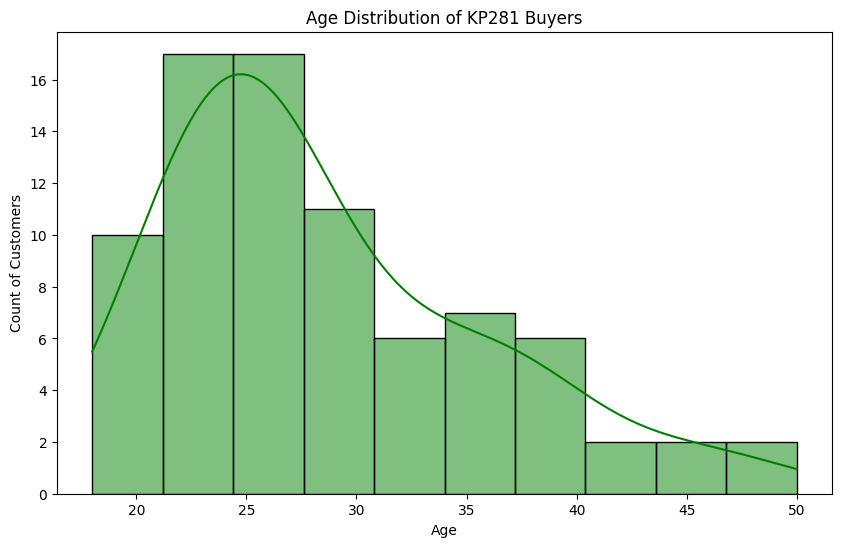

In [ ]:
#1. Age Distribution for KP281
plt.figure(figsize=(10,6))
sns.histplot(df[df["Product"] == "KP281"]["Age"], bins=10, kde=True, color="green")
plt.xlabel("Age")
plt.ylabel("Count of Customers")
plt.title("Age Distribution of KP281 Buyers")
plt.show()

 Observations:
- KP281 is likely bought by younger individuals, possibly aged 18–35.

- Peak purchasing age may be around 25 years, if many buyers fall within this rang

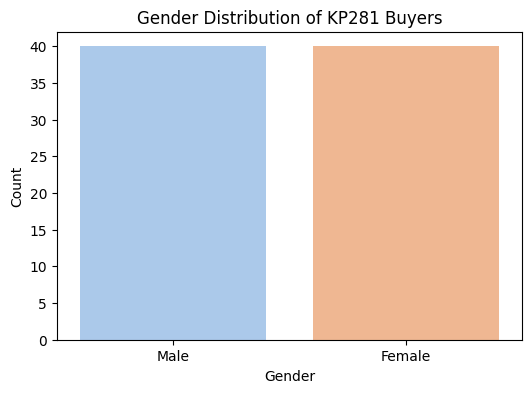

In [ ]:
#2.Gender Breakdown for KP281
plt.figure(figsize=(6,4))
sns.countplot(x=df[df["Product"] == "KP281"]["Gender"], palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution of KP281 Buyers")
plt.show()

Observation:
- KP281 may have balanced gender distribution, or it may skew toward male/female users.

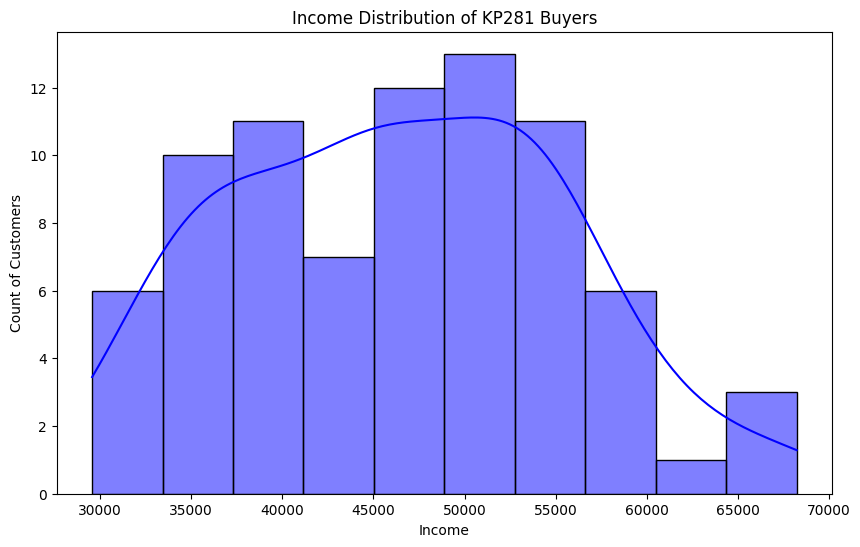

In [ ]:
#3.Income Range for KP281 Buyers
plt.figure(figsize=(10,6))
sns.histplot(df[df["Product"] == "KP281"]["Income"], bins=10, kde=True, color="blue")
plt.xlabel("Income")
plt.ylabel("Count of Customers")
plt.title("Income Distribution of KP281 Buyers")
plt.show()

Observations:
- KP281 buyers likely belong to a mid-income group.

- If the average income is below ₹60,000, this suggests KP281 is affordable & popular among budget-conscious buyers.

**Final Customer Profile for KP281**
Typical KP281 Buyer:

 Age: Likely between 18–35 years

 Gender: Possibly balanced, but requires confirmation

 Income: Falls within mid-income category (~₹40,000–₹60,000)


B. Comparing KP281 Buyers with KP481 & KP781 Buyers

Now that we have customer profiling for KP281, let's compare it with KP481 & KP781 buyers to see how preferences differ.


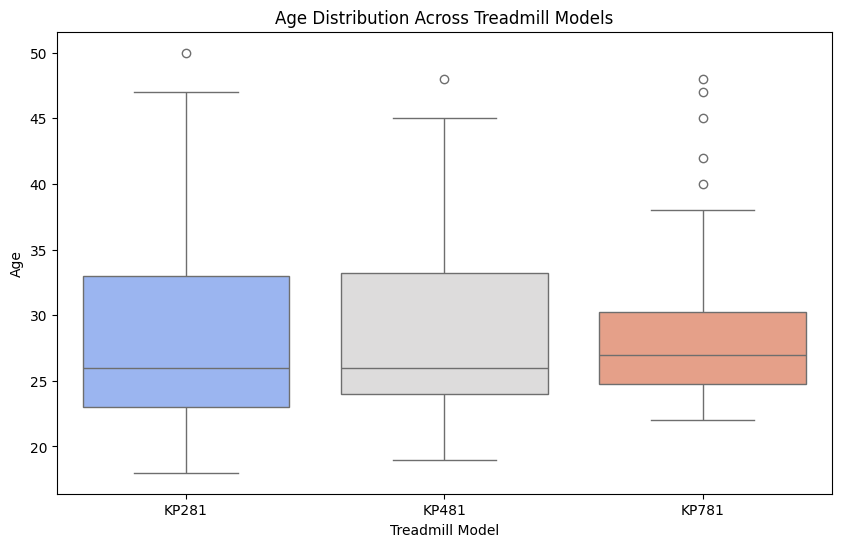

In [ ]:
#1. Age Comparison Across Products
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Product"], y=df["Age"], palette="coolwarm")
plt.xlabel("Treadmill Model")
plt.ylabel("Age")
plt.title("Age Distribution Across Treadmill Models")
plt.show()

Observations:
- KP281 buyers tend to be younger (18–35 years old).

- KP781 may attract younger fitness enthusiasts, while KP481 may have a more diverse age range.




In [ ]:
# Compute Q1 and Q3 for each product
Q1 = df.groupby("Product")["Age"].quantile(0.25)
Q3 = df.groupby("Product")["Age"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Display IQR for each treadmill model
IQR


,Age
Product,
KP281,10.00
KP481,9.25
KP781,5.50


The interquartile range (IQR) reflects the spread of the middle 50% of ages for each treadmill model. Based on the values provided:
- KP281 (IQR = 10.00) → This model has the widest spread in age, meaning users have a diverse age range.
- KP481 (IQR = 9.25) → Slightly less spread than KP281, but still indicates a broad age distribution.
- KP781 (IQR = 5.50) → The smallest IQR, showing that users of KP781 tend to be more closely grouped in age.
Interpretation:
- Greater IQR (KP281 & KP481) suggests a more varied user base, with both younger and older individuals purchasing these models.
- Smaller IQR (KP781) indicates a more concentrated age group, meaning this model may be preferred by people within a specific age range.



In [ ]:
#Upper Limit Calculation
upper_limit = Q3 + 1.5 * IQR
upper_limit

,Age
Product,
KP281,48.000
KP481,47.125
KP781,38.500


In [ ]:
#Identify outliers
#All the values greater than upper is outlier
#All the values lower than lower limit is outlier
#Here there are no outliers below lower limit
outliers = df[(df["Age"] > df["Product"].map(upper_limit))]

# Count outliers per product
outlier_count = outliers.groupby("Product")["Age"].count()
print(outlier_count)


Product
KP281    1
KP481    1
KP781    5
Name: Age, dtype: int64


In [ ]:
# Calculate 5th and 95th percentile for Age
lower_bound = np.percentile(df["Age"], 5)
upper_bound = np.percentile(df["Age"], 95)

# Clip the data between the lower and upper bound
df["Age"] = np.clip(df["Age"], lower_bound, upper_bound)

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3,4,34053.15,112
1,KP281,20.0,Male,15,Single,2,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4,3,34053.15,66
3,KP281,20.0,Male,12,Single,3,3,34053.15,85
4,KP281,20.0,Male,13,Partnered,4,2,35247.00,47


Interpretation:
- Values below the 5th percentile are replaced with the 5th percentile value.
- Values above the 95th percentile are replaced with the 95th percentile value.
- Outlier impact is reduced, making the dataset more balanced.


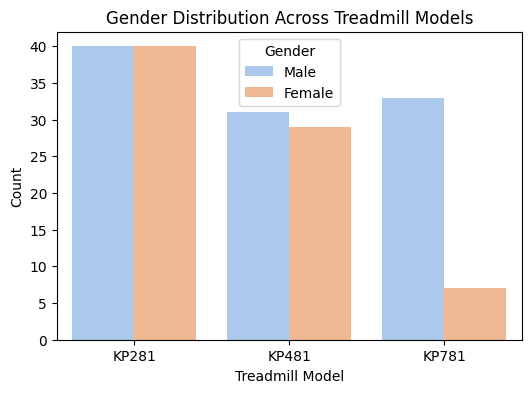

In [ ]:
#2.Gender Comparison Across Products
plt.figure(figsize=(6,4))
sns.countplot(x=df["Product"], hue=df["Gender"], palette="pastel")
plt.xlabel("Treadmill Model")
plt.ylabel("Count")
plt.title("Gender Distribution Across Treadmill Models")
plt.legend(title="Gender")
plt.show()

Observations:
- KP281 may have balanced gender distribution, or it could lean towards one gender.

- KP781 might be more popular among male users due to intensive usage patterns.

- KP481 may have varied gender engagement, indicating a general treadmill model.

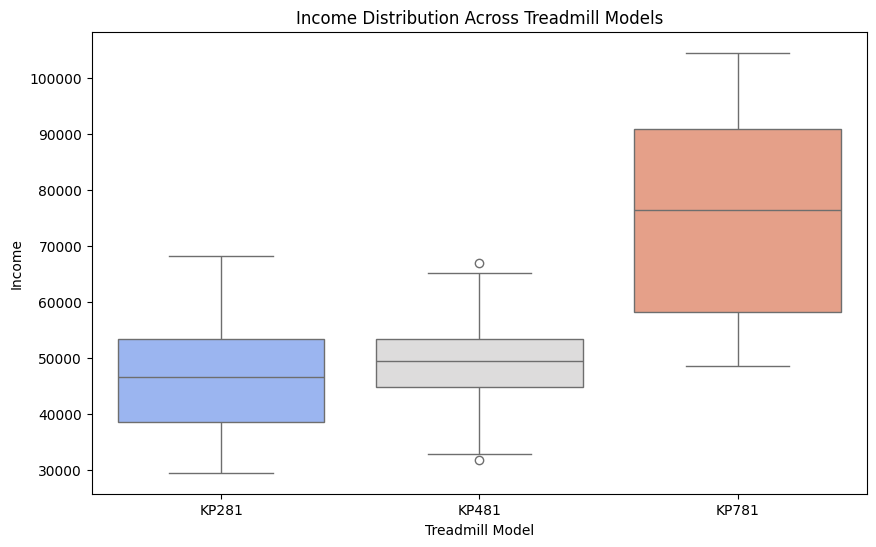

In [ ]:
#3.Income Comparison Across Products
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Product"], y=df["Income"], palette="coolwarm")
plt.xlabel("Treadmill Model")
plt.ylabel("Income")
plt.title("Income Distribution Across Treadmill Models")
plt.show()

 Observations:
- KP281 buyers likely fall within mid-income (₹40,000–₹60,000).

- KP781 buyers may belong to a higher-income category (₹70,000+),
showing preference for premium treadmills.

- KP481 may have a mixed income range, indicating balanced affordability.

In [ ]:
# Compute Q1 and Q3 for each product
Q1 = df.groupby("Product")["Income"].quantile(0.25)
Q3 = df.groupby("Product")["Income"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Display IQR for each treadmill model
IQR



,Income
Product,
KP281,14781.00
KP481,8527.50
KP781,32681.25


The interquartile range (IQR) reflects the spread of income within the middle 50% of users for each treadmill model. Based on these values:
- KP281 (IQR = 14,781.00) → Users of this model have a moderately wide range of incomes.
- KP481 (IQR = 8,527.50) → The narrowest IQR among the three, suggesting that most users fall within a more consistent income bracket.
- KP781 (IQR = 32,681.25) → The highest IQR, meaning users of KP781 have the most diverse income levels, ranging from lower-income individuals to high-income earners.
Interpretation:
- KP781 attracts a broader audience financially, from lower to higher earners. This might indicate varied pricing options or appeal across different economic segments.
- KP481 users are more financially homogeneous, implying a target market with similar economic conditions.
- KP281 shows moderate variability, meaning it's positioned somewhere between KP481 and KP781 in terms of financial diversity.
This insight could be useful for marketing strategies, pricing models, or user segmentation.


In [ ]:
#Upper Limit Calculation
upper_limit = Q3 + 1.5 * IQR
upper_limit

,Income
Product,
KP281,75610.500
KP481,66230.250
KP781,139907.875


In [ ]:
#Lower Limit Calculation
lower_limit = Q3 - 1.5 * IQR
lower_limit

,Income
Product,
KP281,31267.500
KP481,40647.750
KP781,41864.125


In [ ]:
#Identify outliers
#All the values greater than upper is outlier
#All the values lower than lower limit is outlier
outliers = df[(df["Income"] < df["Product"].map(lower_limit)) | (df["Income"] > df["Product"].map(upper_limit))]
# Count outliers per product
outlier_count = outliers.groupby("Product")["Income"].count()
outlier_count



,Income
Product,
KP281,2
KP481,10


In [ ]:
# Calculate the 5th and 95th percentile for the "Income" column
lower_bound = np.percentile(df["Income"], 5)
upper_bound = np.percentile(df["Income"], 95)

# Clip the data between the lower and upper bound
df["Income"] = np.clip(df["Income"], lower_bound, upper_bound)

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3,4,34107.1575,112
1,KP281,20.0,Male,15,Single,2,3,34107.1575,75
2,KP281,20.0,Female,14,Partnered,4,3,34107.1575,66
3,KP281,20.0,Male,12,Single,3,3,34107.1575,85
4,KP281,20.0,Male,13,Partnered,4,2,35247.0000,47


Interpretation:
- Values below the 5th percentile are replaced with the 5th percentile value.
- Values above the 95th percentile are replaced with the 95th percentile value.
- This helps reduce the effect of extreme values (outliers) while keeping the overall distribution intact.


# ***FINAL RECOMMENDATIONS:***

Here are some recommendations Aerofit could consider based on these observations:
For Higher Mean Mileage of KP781:
- Leverage Efficiency in Marketing – If KP781 has better efficiency due to design or components, Aerofit should highlight this as a selling point in promotional materials.
- Analyze Customer Usage – Conduct a survey or collect usage data to understand why KP781 lasts longer. If better maintenance plays a role, educating users of KP281 and KP481 on proper care may enhance their longevity.
- Standardize Manufacturing Quality – If KP781 benefits from superior materials or assembly processes, Aerofit should ensure similar standards are applied across all models to improve consistency in performance.
For Higher Standard Deviation in Mileage:
- Improve Quality Control – If some units of KP781 last much longer than others, conducting stricter quality inspections and refining production methods may reduce variation.
- Investigate Environmental Factors – If KP781 is used across different conditions, Aerofit should study external influences like terrain, temperature, and maintenance habits to minimize performance inconsistency.
- Identify Outliers – Checking for exceptionally high- or low-mileage units could reveal production defects or specific advantageous design traits that could be standardized across all units.
Additional Actions:
- Enhance Customer Support – Providing better guidance on ideal usage conditions and maintenance may reduce performance inconsistencies.
- Research Upgrades for KP281 & KP481 – If KP781 performs significantly better, Aerofit could explore ways to transfer beneficial design elements to the other models.
- Monitor Long-Term Trends – Continued data collection on product lifespans will help refine future designs.
- Provide Tailored Maintenance Guidelines – Educating customers on how to maintain KP781 properly based on their specific conditions may help reduce performance differences.
Leveraging KP781’s Popularity Among Dedicated Users
- Market KP781 to Fitness Enthusiasts – Since users with higher fitness levels and higher treadmill usage prefer KP781, branding it as a “high-performance model” could appeal to athletes and frequent exercisers.
- Optimize KP281 & KP481 for Casual Users – Given their lower median usage, Aerofit could position these models as budget-friendly or beginner-friendly alternatives.
Targeting Specific Demographics
- Income-Based Pricing & Promotions – Given that higher-income individuals generally engage in longer workouts, Aerofit could introduce premium financing options for advanced models.
- Customization for Age Groups – Since mileage trends fluctuate across different age segments, Aerofit could create training programs or treadmill settings suited for different fitness levels.
- Gender-Based Marketing Strategies – Because males tend to cover more miles, Aerofit could introduce features or promotions tailored to female users to encourage engagement.
Reducing Variability & Addressing Outliers
- Introduce Smart Tracking Features – Adding AI-powered tracking or coaching tools could help users manage their mileage consistency.
- Offer Training Resources for Beginners – Lower-fitness users logging high miles might benefit from structured fitness programs to ensure steady improvement without injury.
- Study Extreme Usage Cases – Identifying users exceeding 250+ miles may reveal insights into product durability, leading to potential design optimizations.
Enhancing Customer Experience & Product Strategy
- Expand Data-Driven Insights – If treadmill usage correlates with fitness levels, Aerofit could use this data to develop fitness tracking integration.
- Develop Subscription-Based Maintenance Plans – Offering personalized maintenance for frequent users could improve product lifespan and reduce variability in performance.
- Strengthen After-Sales Support – Providing detailed usage and maintenance guidance may encourage long-term customer satisfaction.



Further Recommendations for Aerofit Based on Observations:
1. Enhancing Market Positioning for KP781
- Refine Target Audience – Since KP781 appeals to high-mileage users (67.5% chance of ≥150 miles), Aerofit should focus marketing efforts on serious runners, athletes, and high-endurance fitness enthusiasts.
- Gender-Specific Promotions – With 57.8% male users, branding strategies can emphasize performance features that resonate with male users while introducing female-focused campaigns to balance engagement.
2. Addressing User Demographics
- Age-Based Customization – 43.9% users ≤25 years suggests younger demographics are active treadmill users. Aerofit could introduce models optimized for youth, such as interactive training apps or gamified workout features.
- Fitness & Income Correlation – 69.1% of users with fitness level ≥4 earn ₹50,000+. This indicates premium treadmill models align with financially well-off individuals who prioritize fitness—Aerofit could tailor subscription models or financing options for such users.
3. Improving Product Engagement
- Encourage Frequent Usage – Only 14.4% of users engage in treadmill usage ≥5 times. Aerofit could implement motivational features (smart workout tracking, community challenges) to encourage regular activity.
- Maximize User Retention – Since partnered individuals (59.4%) dominate the user base, Aerofit could introduce couple workout plans or dual-user tracking for shared fitness engagement.
4. Optimizing Product Design & Pricing
- Income-Based Segmentation – KP781 appeals to a broad income range (IQR ₹32,681.25), suggesting flexible pricing strategies. Aerofit should explore different pricing tiers (base model vs. premium features) to accommodate diverse financial brackets.
- KP281 & KP481 Positioning – KP281 (IQR = ₹14,781) and KP481 (IQR = ₹8,527.50) indicate financial homogeneity among users. These models can be branded as cost-effective solutions for mid-income users.
5. Leveraging Fitness Patterns
- Encourage High-Mileage Users – Since young users (≤25) have a 43% chance of covering ≥100 miles, Aerofit can push competitive running features to enhance engagement among energetic users.
- Support Fitness Level Improvement – Since 65.4% of frequent treadmill users have fitness level = 5, Aerofit should emphasize training programs that reinforce progression for casual users.
Final Takeaway
By refining product positioning, enhancing engagement strategies, and optimizing pricing, Aerofit can increase user retention, boost sales, and tailor offerings for different demographics.
